[Data_School](https://www.youtube.com/watch?v=3ZWuPVWq7p4&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=6)
[JWarmenhoven](https://github.com/JWarmenhoven/ISLR-python)

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

# Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html
data = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
print(data.head())
print()
# print(data.info())
# print()
print(data.shape)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

(200, 4)


/Users/sungchullee/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


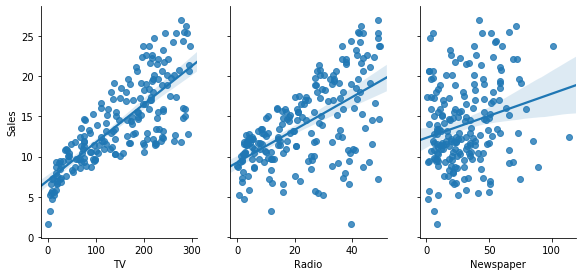

In [3]:
import seaborn as sns

sns.pairplot(data, 
             x_vars=['TV','Radio','Newspaper'], 
             y_vars='Sales', size=4, aspect=0.7, 
             kind='reg')

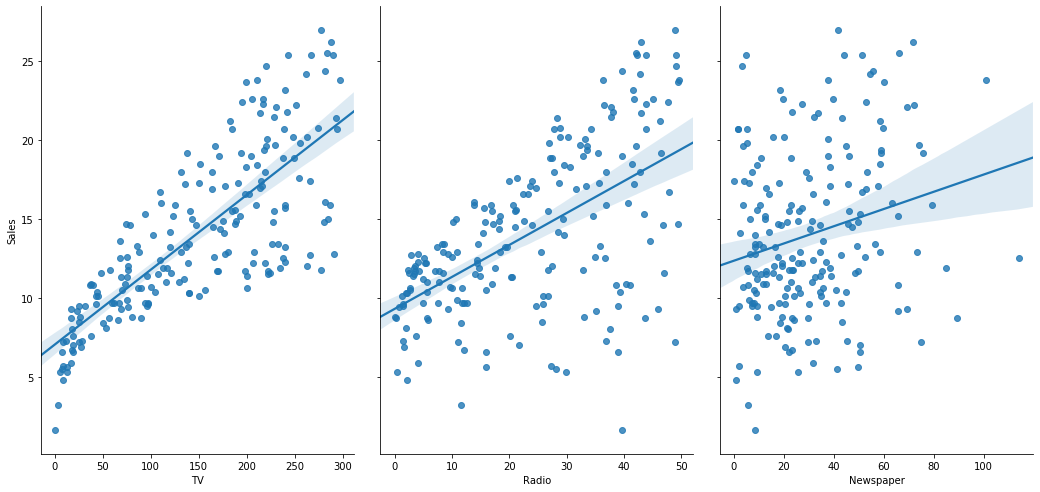

In [4]:
%matplotlib inline
import pandas as pd
import seaborn as sns
data = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
sns.pairplot(data, 
             x_vars=['TV','Radio','Newspaper'], 
             y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [5]:
from sklearn.model_selection import train_test_split

feature_cols = ['TV', 'Radio', 'Newspaper'] 
X = data[feature_cols]
y = data['Sales']
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 3)
(200,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(150, 3)
(150,)
(50, 3)
(50,)


In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_test_pred = reg.predict(X_test)

print(reg.intercept_)
print(reg.coef_)
print()

feature_cols = ['TV', 'Radio', 'Newspaper'] 
print(list(zip(feature_cols, reg.coef_)))
print()

2.8769666223179318
[0.04656457 0.17915812 0.00345046]

[('TV', 0.04656456787415028), ('Radio', 0.17915812245088836), ('Newspaper', 0.0034504647111804412)]



$$
\begin{array}{lll}
\mbox{MAE}&&\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|\\
\mbox{MSE}&&\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2\\
\mbox{RMSE}&&\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}
\end{array}
$$

In [8]:
import numpy as np
from sklearn import metrics

print(metrics.mean_absolute_error(y_test, y_test_pred))
print(metrics.mean_squared_error(y_test, y_test_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

1.0668917082595213
1.9730456202283384
1.4046514230328955


## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [9]:
import numpy as np

score = []

feature_cols = ['TV', 'Radio', 'Newspaper']
for feature_drop in feature_cols:
    feature_cols = ['TV', 'Radio', 'Newspaper']     
    feature_cols.remove(feature_drop)

    X_train_new = X_train[feature_cols]
    X_test_new = X_test[feature_cols]
    
    reg = LinearRegression()
    reg.fit(X_train_new, y_train)
    y_test_pred = reg.predict(X_test_new)
    
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    score.append(rmse)
    
feature_cols = ['TV', 'Radio', 'Newspaper']
print(feature_cols) 
print(score)

['TV', 'Radio', 'Newspaper']
[3.748697497467727, 3.352056334433862, 1.3879034699382888]


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

In [21]:
import pandas as pd
import statsmodels.formula.api as smf
data = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
#est = smf.ols('Sales ~ TV', data).fit()
#est = smf.ols('Sales ~ Radio', data).fit()
#est = smf.ols('Sales ~ Newspaper', data).fit()
est = smf.ols('Sales ~ TV + Radio + Newspaper', data).fit()
#est = smf.ols('Sales ~ TV + Radio', data).fit()
#est = smf.ols('Sales ~ TV + Radio + TV*Radio', data).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


In [26]:
import pandas as pd
import statsmodels.formula.api as smf
data = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
est = smf.ols('Sales ~ TV + Radio + Newspaper', data).fit()
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


In [31]:
import pandas as pd
import numpy as np
import scipy.stats as stats
data = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])
x = data[["TV", "Radio", "Newspaper"]].values 
y = data.Sales.values.reshape((-1,1))
X = np.concatenate([np.ones((200,1)), x], axis=1)
beta_hat = np.linalg.inv(X.T@X)@X.T@y  # coef
y_hat = X@beta_hat
sigma_square_hat = np.sum((y-y_hat)**2) / (200-3-1)
v_j = np.diagonal(np.linalg.inv(X.T@X))
std_err = (np.sqrt(sigma_square_hat) * np.sqrt(v_j)).reshape((-1,1))
t = beta_hat / std_err 
p_value = 2 * stats.t(200-3-1).sf(np.abs(t)) 
print(beta_hat)  # coef
print(std_err)  # std_err
print(t)  # t
print(p_value)  # p_value

[[ 2.93888937e+00]
 [ 4.57646455e-02]
 [ 1.88530017e-01]
 [-1.03749304e-03]]
[[0.31190824]
 [0.0013949 ]
 [0.00861123]
 [0.00587101]]
[[ 9.42228844]
 [32.80862443]
 [21.89349606]
 [-0.17671459]]
[[1.26729451e-17]
 [1.50995995e-81]
 [1.50533892e-54]
 [8.59915050e-01]]


In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])

feature_cols = ['TV', 'Radio', 'Newspaper'] 
x = data[feature_cols]
y = data['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

reg = LinearRegression()    
reg.fit(x_train, y_train)

y_test_pred = reg.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(rmse)

1.4046514230328955


In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])

feature_cols = ['TV', 'Radio'] 
x = data[feature_cols]
y = data['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

reg = LinearRegression()    
reg.fit(x_train, y_train)

y_test_pred = reg.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(rmse)

1.3879034699382888


In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

data = pd.read_csv('data/Advertising.csv', usecols=[1,2,3,4])

feature_cols = ['TV', 'Radio'] 
x = data[feature_cols]
y = data['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

x_train['TV*Radio'] = x_train['TV'] * x_train['Radio']
x_test['TV*Radio'] = x_test['TV'] * x_test['Radio']

reg = LinearRegression()    
reg.fit(x_train, y_train)

y_test_pred = reg.predict(x_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(rmse)

0.7011871137164326


/Users/sungchullee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sungchullee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


$$
f(x^{(i)})=\beta_0+\sum_{j=1}^p\beta_jx_j^{(i)}
$$
$$
$$
$$
{\bf X}=\left[\begin{array}{cccccc}
1&x^{(1)}_1&x^{(1)}_2&\cdots&x^{(1)}_p\\
1&x^{(2)}_1&x^{(2)}_2&\cdots&x^{(2)}_p\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&x^{(N)}_1&x^{(N)}_2&\cdots&x^{(N)}_p\\
\end{array}\right]
$$
$$
$$
$$
\hat\beta=({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}
$$
$$
$$
$$
\hat{\bf y}={\bf X}\hat\beta={\bf X}({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}
$$
$$
$$
$$
\hat\beta=({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}\sim N(\beta,({\bf X}^T{\bf X})^{-1}\sigma^2)
$$
$$
$$
$$
\hat\sigma^2=\frac{1}{N-p-1}\sum_{i=1}^N(y^{(i)}-\hat y^{(i)})^2\sim \sigma^2\frac{\chi^2_{N-p-1}}{N-p-1}
$$
$$
$$
Under $H_0:\beta_j=0$
$$
t_j=\frac{\hat\beta_j}{\hat\sigma\sqrt{v_j}}\sim t_{N-p-1}
$$
where
$$
v_j=({\bf X}^T{\bf X})^{-1}_{jj}
$$